# Predicting galaxy redshift from band magnitudes with random forest

Zooey Nguyen

2021-07-08

2021-07-16: Update with photoz_metrics and v3 crossmatched data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (10,10)})
from photoz_metrics import *
from photoz_utils import *

## Setup

In [2]:
df = import_photoz_data('/data/HSC/HSC_v3/trimmed_forced_forced2_spec_z_matched_online.csv')
df = clean_photoz_data(df)
X_train, X_test, y_train, y_test = split_photoz_data(df)

               g_mag          r_mag          i_mag          z_mag  \
count  122131.000000  122131.000000  122131.000000  122131.000000   
mean       23.162820      22.326554      21.686068      21.338282   
std         1.353069       1.297307       1.289589       1.295834   
min        16.207699      15.334381      14.787071      14.448893   
25%        22.456253      21.694773      21.087153      20.725318   
50%        23.241270      22.475418      21.830765      21.468258   
75%        23.998854      23.103663      22.370147      22.019053   
max        34.930744      32.492126      31.049211      28.897368   

               y_mag          zspec  
count  122131.000000  122131.000000  
mean       21.158419       0.839552  
std         1.313658       0.531311  
min        14.223459       0.010250  
25%        20.522226       0.548421  
50%        21.289488       0.745700  
75%        21.859919       0.978300  
max        34.435986       3.996137  


## Train random forest regressor

In [3]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 200)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

## Evaluate training point estimates

In [4]:
y_train_pred = rf_model.predict(X_train)
y_train_pred = pd.Series(y_train_pred, index=y_train.index)

In [5]:
print_point_metrics(y_train_pred, y_train)

Bias: 0.0038584169374174405
Scatter: 0.03064956067915776
Conventional outlier rate: 0.05031523786129534
Biweight outlier rate: 0.17744411692458856
Losses: 
109195    0.001115
88556     0.053690
110996    0.000813
116719    0.000486
23746     0.003498
            ...   
75555     0.083152
46249     0.003548
104081    0.001510
103886    0.080458
97844     0.006686
Length: 97704, dtype: float64


In [6]:
print_point_metrics(y_train_pred, y_train, binned=True)

            count      bias   scatter  outlier_conv  outlier_bw  mean_loss
bin                                                                       
(0.0, 0.2]   4639  0.078684  0.121915      0.337142    0.090321   0.312203
(0.2, 0.4]   7414  0.058599  0.076916      0.187618    0.096709   0.230268
(0.4, 0.6]  18829  0.017758  0.028038      0.034999    0.136120   0.079983
(0.6, 0.8]  24578  0.006132  0.017940      0.007690    0.131296   0.034557
(0.8, 1.0]  19510 -0.001035  0.016075      0.003434    0.127473   0.023817
(1.0, 1.2]   9523 -0.009384  0.023813      0.004305    0.115195   0.039653
(1.2, 1.4]   4105 -0.023719  0.037123      0.003898    0.075761   0.077871
(1.4, 1.6]   2609 -0.042607  0.044050      0.017248    0.050594   0.124974
(1.6, 1.8]   1699 -0.050615  0.047645      0.040612    0.054738   0.153008
(1.8, 2.0]   1127 -0.062135  0.051136      0.070985    0.042591   0.187540
(2.0, 2.2]    763 -0.064597  0.051986      0.077326    0.034076   0.193972
(2.2, 2.4]    520 -0.0706

<AxesSubplot:xlabel='zspec'>

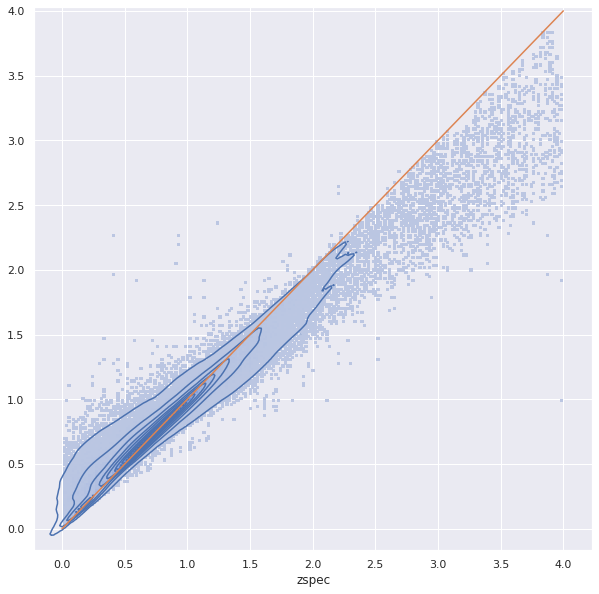

In [14]:
sns.histplot(x=y_train, y=y_train_pred)
sns.kdeplot(x=y_train, y=y_train_pred)
sns.lineplot(x=[0,4], y=[0,4])

## Evaluate test point estimates

In [8]:
y_test_pred = rf_model.predict(X_test)
y_test_pred = pd.Series(y_test_pred, index=y_test.index)

In [9]:
print_point_metrics(y_test_pred, y_test)

Bias: 0.010833775985588613
Scatter: 0.08290644941219004
Conventional outlier rate: 0.1986326605805052
Biweight outlier rate: 0.17840913742989314
Losses: 
89933     0.047882
56053     0.163906
38539     0.000304
85873     0.245367
90829     0.000096
            ...   
116573    0.863699
59279     0.091352
10423     0.496629
63157     0.074813
76356     0.105189
Length: 24427, dtype: float64


In [10]:
print_point_metrics(y_test_pred, y_test, binned=True)

            count      bias   scatter  outlier_conv  outlier_bw  mean_loss
bin                                                                       
(0.0, 0.2]   1200  0.217609  0.339155      0.521667    0.085000   0.505266
(0.2, 0.4]   1840  0.150510  0.211147      0.471739    0.102174   0.459402
(0.4, 0.6]   4701  0.047940  0.074307      0.197618    0.144650   0.236367
(0.6, 0.8]   6109  0.016911  0.047824      0.079555    0.138648   0.128312
(0.8, 1.0]   4742 -0.001121  0.042615      0.047870    0.125053   0.096474
(1.0, 1.2]   2379 -0.024708  0.062386      0.078184    0.103825   0.149428
(1.2, 1.4]   1065 -0.070871  0.102911      0.252582    0.070423   0.284690
(1.4, 1.6]    673 -0.106711  0.118218      0.365527    0.059435   0.369013
(1.6, 1.8]    416 -0.131471  0.115203      0.430288    0.038462   0.404634
(1.8, 2.0]    319 -0.161512  0.130965      0.492163    0.018809   0.458991
(2.0, 2.2]    197 -0.183795  0.135491      0.573604    0.025381   0.506357
(2.2, 2.4]    125 -0.2105

<AxesSubplot:xlabel='zspec'>

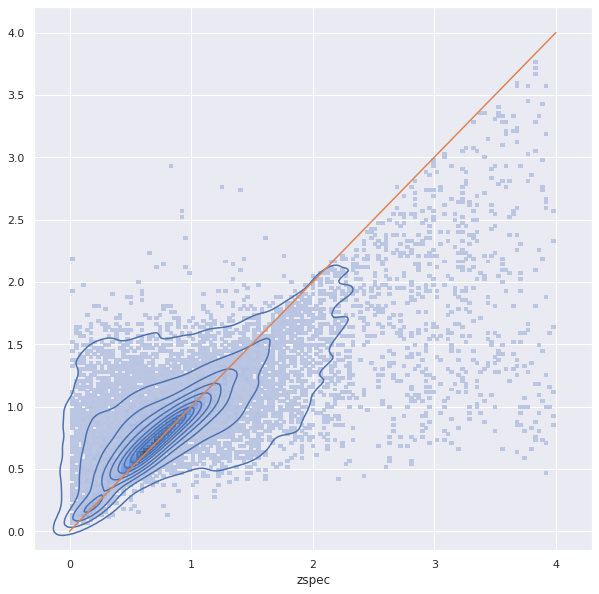

In [13]:
sns.histplot(x=y_test, y=y_test_pred)
sns.kdeplot(x=y_test, y=y_test_pred)
sns.lineplot(x=[0,4], y=[0,4])

In [11]:
# density estimates
# predictions = []
# for i in range (len(rf_model.estimators_)):
#    predictions.append(np.array(rf_model.estimators_[i].predict(X_train)))    
# y_train_densities = np.asarray(predictions).T